# This notebook contains the following analysis:
1. Implement the trained network on the manually merged Test set (a).
2. Apply SOS boosting to the network denoised data using hyperparameters optimized through a grid search.
3. Apply SOS boosting to the network denoised data using manually tuned hyperparameters.
4. Calculate SNR and R2-score using the ground truth.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
import function as fx

In [66]:
# load the first test data set: manually merged data
noisy_a    = np.load("../data/test_a.npy")
clean_a    = np.load("../data/clean_a.npy")
clean_a_4d = np.reshape(clean_a, (clean_a.shape[0], clean_a.shape[1], clean_a.shape[2], 1))
noisy_a_4d = np.reshape(noisy_a, (noisy_a.shape[0], noisy_a.shape[1], noisy_a.shape[2], 1))
print('Test set_a loaded.')
print('The size of the noisy data set is:', noisy_a.shape)
print('The size of the ground truth data set is:', clean_a.shape)

Test set_a loaded.
The size of the noisy data set is: (50, 256, 128)
The size of the ground truth data set is: (50, 256, 128)


## Implement the trained network on the manually merged Test set (a).

In [67]:
# load the trained model
eta          = 0.00025
lmbd         = 1e-6
prev_model   = '../model/eta{}_lmd{}_model.h5'.format(eta, lmbd)
prev_weights = '../weights/eta{}_lmd{}_weights.h5'.format(eta, lmbd)
model        = load_model(prev_model)
weights      = model.load_weights(prev_weights)
print('Model loaded.')

# Apply CNN denoising
denoised_a_4d = model.predict(noisy_a_4d)
denoised_a    = np.reshape(denoised_a_4d,(clean_a.shape[0], clean_a.shape[1], clean_a.shape[2]))
diff_a        = clean_a - denoised_a
print('CNN denoising finished.')

Model loaded.
CNN denoising finished.


## Apply SOS boosting to the network denoised data using hyperparameters optimized through a grid search.

In [68]:
# apply SOS boosting
# we first use the optimal values of the hyperparameters obtained by using the grid search
rho = -0.75
tau = 0.1

print('rho =', rho)
print('tau =', tau)
print('SOS boosting started.')
denoised_a_bst_4d = denoised_a_4d

for i in range(10):
    
    denoised_a_bst_4d = fx.Boost(rho, tau, model, noisy_a_4d, denoised_a_bst_4d)

denoised_a_bst = np.reshape(denoised_a_bst_4d,(clean_a.shape[0], clean_a.shape[1], clean_a.shape[2]))
diff_a_bst     = clean_a - denoised_a_bst
print('SOS boosting finished.')

rho = -0.75
tau = 0.1
SOS boosting started.
SOS boosting finished.


## Calculate SNR and R2-score using the ground truth.

In [69]:
# show No.n example in this data set
n       = 2
# calculate the SnR 
print('SNR of the noisy image is:', fx.SNR(clean_a[n], noisy_a[n]))
print('SNR of the CNN denoised image is:',fx.SNR(clean_a[n], denoised_a[n]))
print('SNR of the CNN denoised image after applying SOS boosting is:', fx.SNR(clean_a[n], denoised_a_bst[n]))

# calculate the R2-score
print('R2-score of the noisy image is:', fx.R2Score(clean_a[n], noisy_a[n]))
print('R2-score of the CNN denoised image is:',fx.R2Score(clean_a[n], denoised_a[n]))
print('R2-score of the CNN denoised image after applying SOS boosting is:',fx.R2Score(clean_a[n], denoised_a_bst[n]))

SNR of the noisy image is: -31.146071266580257
SNR of the CNN denoised image is: 1.3635062114289367
SNR of the CNN denoised image after applying SOS boosting is: 3.2521898336474235
R2-score of the noisy image is: -50.485599517822266
R2-score of the CNN denoised image is: 0.9711113050580025
R2-score of the CNN denoised image after applying SOS boosting is: 0.9812992215156555


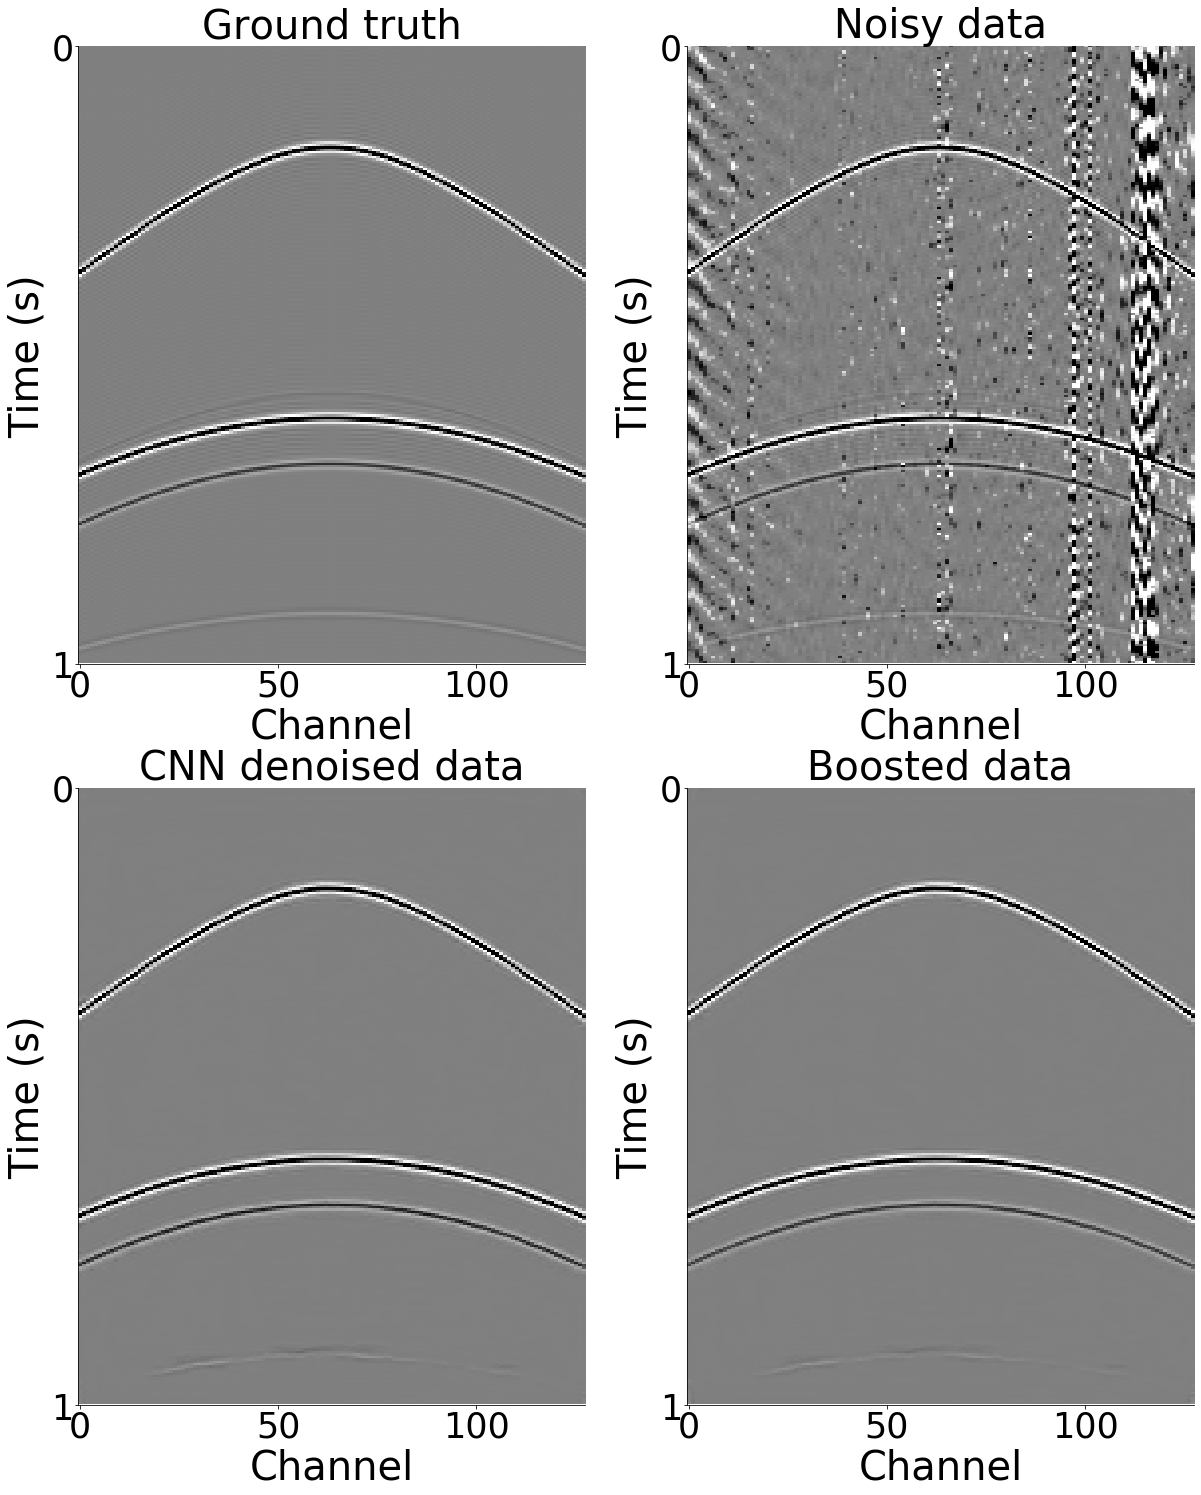

In [70]:
# plot and save
img_rows = 256
img_cols = 128
v_min    = -np.max(np.abs(clean_a))/4
v_max    = np.max(np.abs(clean_a))/4
sr       = 0.004
ystr     = np.arange(int(sr*img_rows)+1)
y        = np.linspace(0, img_rows, int(sr*img_rows) + 1)

plt.subplots(figsize=(20,25))
ax=plt.subplot(2,2,1)
plt.imshow(clean_a[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('Ground truth', size = 40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(2,2,2)
plt.imshow(noisy_a[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('Noisy data', size =40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(2,2,3)
plt.imshow(denoised_a[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('CNN denoised data', size =40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(2,2,4)
plt.imshow(denoised_a_bst[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('Boosted data', size =40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#plt.savefig('../plot_img/rho{}_tau{}_boost_a_{}.png'.format(rho, tau, n), bbox_inches='tight', dpi=200)

## Apply SOS boosting to the network denoised data using manually tuned hyperparameters.

In [72]:
# apply SOS boosting
# use the manually tuned hyperparameters
rho = 1
tau = 0.7

print('rho =', rho)
print('tau =', tau)
print('SOS boosting started.')
denoised_a_bst_4d = denoised_a_4d

for i in range(10):
    
    denoised_a_bst_4d = fx.Boost(rho, tau, model, noisy_a_4d, denoised_a_bst_4d)

denoised_a_bst = np.reshape(denoised_a_bst_4d,(clean_a.shape[0], clean_a.shape[1], clean_a.shape[2]))
diff_a_bst     = clean_a - denoised_a_bst
print('SOS boosting finished.')

rho = 1
tau = 0.7
SOS boosting started.
SOS boosting finished.


## Calculate SNR and R2-score using the ground truth.

In [74]:
# show No.n example in this data set
n       = 2
# calculate the SnR 
print('SNR of the noisy image is:', fx.SNR(clean_a[n], noisy_a[n]))
print('SNR of the CNN denoised image is:',fx.SNR(clean_a[n], denoised_a[n]))
print('SNR of the CNN denoised image after applying SOS boosting is:', fx.SNR(clean_a[n], denoised_a_bst[n]))

# calculate the R2-score
print('R2-score of the noisy image is:', fx.R2Score(clean_a[n], noisy_a[n]))
print('R2-score of the CNN denoised image is:',fx.R2Score(clean_a[n], denoised_a[n]))
print('R2-score of the CNN denoised image after applying SOS boosting is:', fx.R2Score(clean_a[n], denoised_a_bst[n]))

SNR of the noisy image is: -31.146071266580257
SNR of the CNN denoised image is: 1.3635062114289367
SNR of the CNN denoised image after applying SOS boosting is: -8.152123698326779
R2-score of the noisy image is: -50.485599517822266
R2-score of the CNN denoised image is: 0.9711113050580025
R2-score of the CNN denoised image after applying SOS boosting is: 0.741600900888443


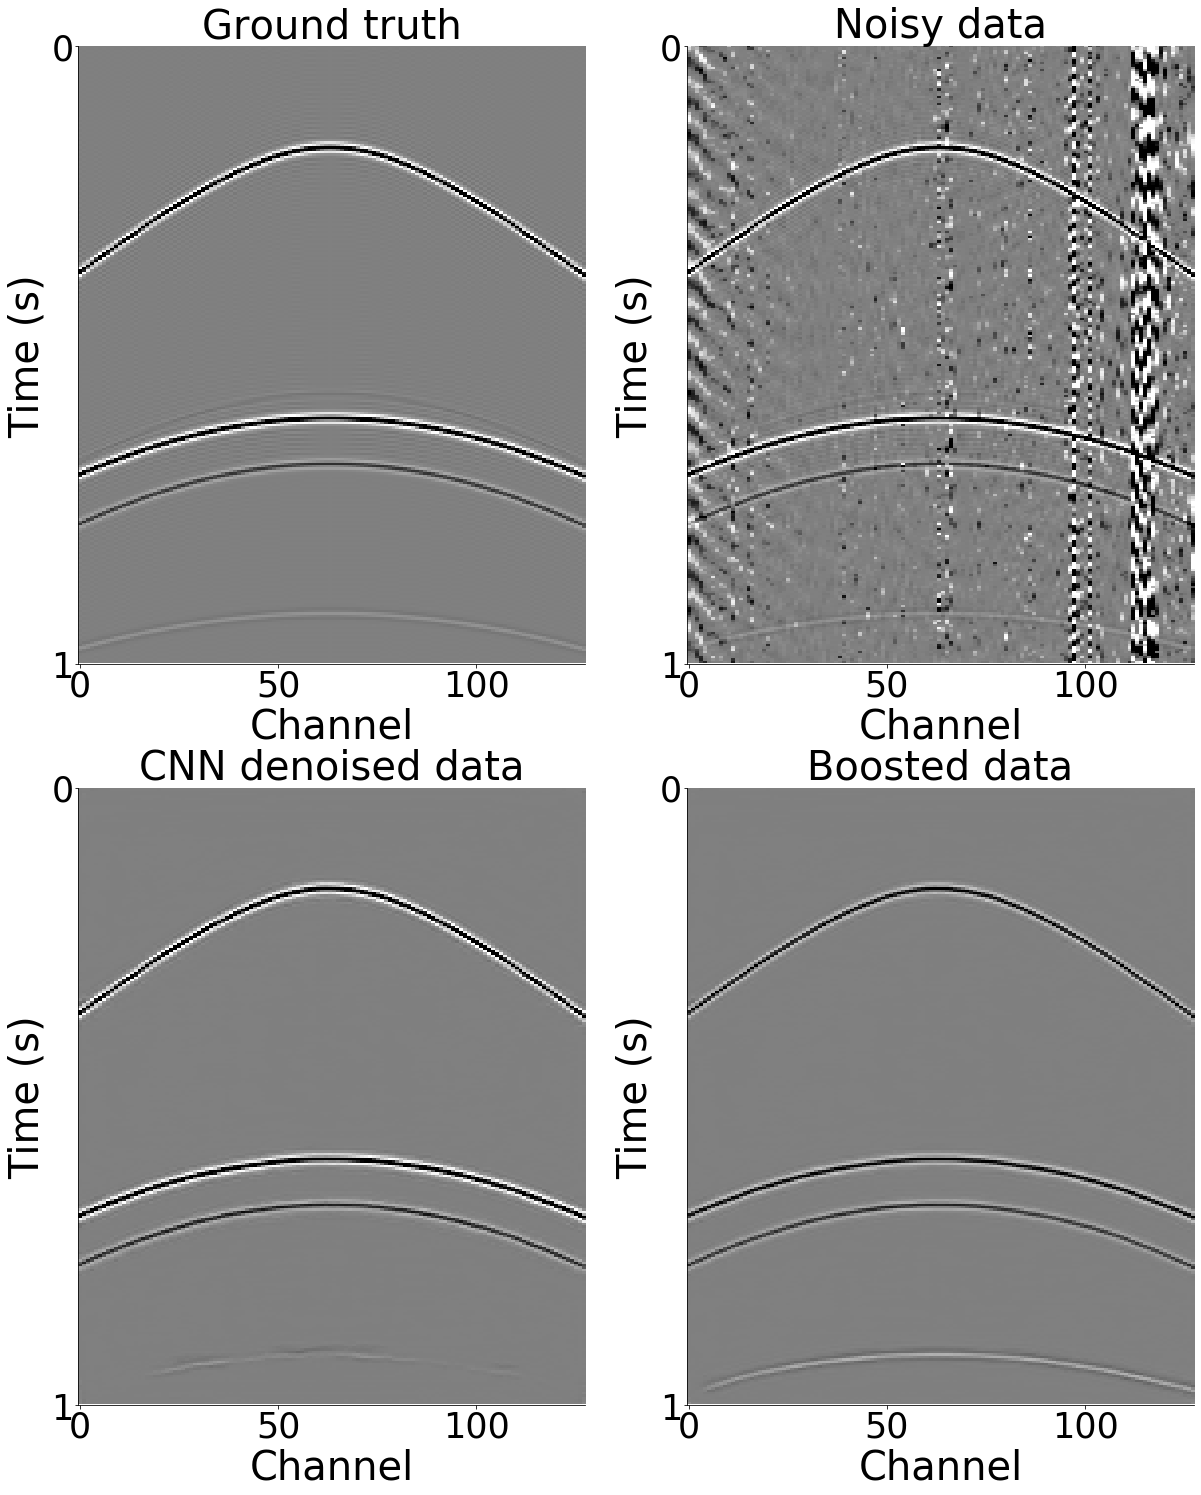

In [75]:
# plot and save
img_rows = 256
img_cols = 128
v_min    = -np.max(np.abs(clean_a))/4
v_max    = np.max(np.abs(clean_a))/4
sr       = 0.004
ystr     = np.arange(int(sr*img_rows)+1)
y        = np.linspace(0, img_rows, int(sr*img_rows) + 1)

plt.subplots(figsize=(20,25))
ax=plt.subplot(2,2,1)
plt.imshow(clean_a[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('Ground truth', size = 40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(2,2,2)
plt.imshow(noisy_a[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('Noisy data', size =40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(2,2,3)
plt.imshow(denoised_a[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('CNN denoised data', size =40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(2,2,4)
plt.imshow(denoised_a_bst[n], vmin=v_min, vmax=v_max, cmap='gray', aspect='auto', origin='upper')
plt.title('Boosted data', size =40);
plt.ylabel('Time (s)',fontsize=40);
plt.xlabel('Channel',fontsize=40);
ax.tick_params(axis='x', which='major', labelsize=35,pad=1)
ax.tick_params(axis='y', which='major', labelsize=35,pad=1)
plt.yticks(y, ystr)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#plt.savefig('../plot_img/rho{}_tau{}_boost_a_{}.png'.format(rho, tau, n), bbox_inches='tight', dpi=200)